In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

dax_df=pd.read_csv('../Data/dax_19700103_20170412.csv', sep=';', header=0)

# Some definitions and initialisation
dataSet = np.zeros((len(dax_df), 3))
refdate = '01.01.1900'
date_format = "%d.%m.%Y"
b = datetime.strptime(refdate, date_format)

for i in range(len(dax_df)):
# The next 7 lines are needed to convert the date format in "%d.%m.%Y". 
# If the data already has this format nothing should happen.
  d=dax_df['Datum'][i].split('.')[0]
  m=dax_df['Datum'][i].split('.')[1]
  y=dax_df['Datum'][i].split('.')[2]
  if int(y)>17 and int(y)<1000:
    y=str(int(y)+1900)
  else:
    y=str(int(y)+2000)
  origDate = str(d+'.'+m+'.'+y)
  a = datetime.strptime(origDate, date_format)
  dataSet[i,0] = int(str(a-b).split(' ')[0])
  
# The original data had commas as decimal signs. With sed all commas were replaced with points. 
# Now there are numbers like 1.000.54 which are catched by the following 'try' statemants.  
  try:
    dataSet[i][1] = float(dax_df['Eroeffnung'][i])
  except:
    tmpEroeffnung = str(dax_df['Eroeffnung'][i]).split('.')
    dataSet[i][1] = float(str(tmpEroeffnung[0]+tmpEroeffnung[1]+'.'+tmpEroeffnung[2]))   
  try:
    dataSet[i][2] = float(dax_df['Schluss'][i])
  except:
    tmpSchluss = str(dax_df['Schluss'][i]).split('.')
    dataSet[i][2] = float(str(tmpSchluss[0]+tmpSchluss[1]+'.'+tmpSchluss[2]))


# Test!!!!!!!!!!
dataSet = dataSet[:,2]
    
print dataSet

[   628.48    622.38    623.38 ...,  12200.52  12139.35  12154.7 ]


In [2]:
# convert an array of values into a dataset matrix
def get_windows(dataset,winLength):
  x_train, y_train = [], []
  for i in range(len(dataset)-(winLength+1)):
    x_train.append(dataset[i:i+winLength])
    y_train.append(dataset[i+winLength])
  return np.array(x_train), np.array(y_train)

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    print i
    #a = dataset[i:(i+look_back), 0]
    a = dataset[i:(i+look_back)]
    dataX.append(a)
    dataY.append(dataset[i + look_back])
    # dataY.append(dataset[i + look_back,2])
  return np.array(dataX), np.array(dataY)

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

# split into train and test sets
train_size = int(len(dataSet) * 0.67)
test_size = len(dataSet) - train_size
# train, test = dataSet[0:train_size,:], dataSet[train_size:len(dataSet),:]
train, test = dataSet[0:train_size], dataSet[train_size:len(dataSet)]

# reshape into X=t and Y=t+1
look_back = 1
#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
trainX, trainY = get_windows(train,50)
testX, testY = get_windows(test,50)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

print trainX.shape
#print trainX

trainX = np.array(normalise_windows(trainX))
testX = np.array(normalise_windows(testX))
#print trainX
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print trainX.shape


for j in range(trainX.shape[0]-1):
  trainY[j]=trainX[j+1][-1]

for j in range(testX.shape[0]-1):
  testY[j]=testX[j+1][-1]

print trainY.shape
print trainY

# window_data = np.reshape(trainX[0:7950], (159,50,1,3))
# window_data = np.reshape(trainX[0:7950], (159,50,1))
# print window_data.shape
# print window_data

# normalised_data = normalise_windows(window_data)

# print normalised_data 
print trainX[0:3]
print trainY[0:3]
#print testX


(7930, 50, 1)
(7930, 50, 1)
(7930,)
[ -8.39679938e-02  -8.65603645e-02  -9.65327092e-02 ...,  -1.63274289e-01
  -1.37701084e-01   4.81182000e+03]
[[[ 0.        ]
  [-0.00970596]
  [-0.00811482]
  [-0.0073988 ]
  [-0.01556135]
  [-0.02480588]
  [-0.03373218]
  [-0.04195838]
  [-0.05853806]
  [-0.07433809]
  [-0.07747263]
  [-0.07592923]
  [-0.06095659]
  [-0.05658096]
  [-0.06095659]
  [-0.05989053]
  [-0.05716968]
  [-0.05592859]
  [-0.06994654]
  [-0.07368572]
  [-0.08581021]
  [-0.09042452]
  [-0.0835667 ]
  [-0.083153  ]
  [-0.07148994]
  [-0.06841904]
  [-0.07557918]
  [-0.07314473]
  [-0.07651795]
  [-0.08291433]
  [-0.08285069]
  [-0.0909655 ]
  [-0.08273931]
  [-0.08343941]
  [-0.08125955]
  [-0.08491917]
  [-0.09338404]
  [-0.0968209 ]
  [-0.10173753]
  [-0.11120481]
  [-0.12587513]
  [-0.11947874]
  [-0.11102979]
  [-0.10694055]
  [-0.12321792]
  [-0.11675789]
  [-0.10894539]
  [-0.09540479]
  [-0.08469641]
  [-0.09392503]]

 [[ 0.        ]
  [ 0.00160674]
  [ 0.00232977]
  [-

In [12]:
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        units=layers[1],
        input_shape=(None, layers[0]),
        #input_dim=layers[0],
        #output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    #model.add(LSTM(
    #    layers[2],
    #    return_sequences=True))
    #model.add(Dropout(0.2))
    
    model.add(LSTM(
        layers[3],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(units=layers[4]))
    
    model.add(Activation("linear"))

    start = time.time()
    #model.compile(loss="mse", optimizer="rmsprop")
    model.compile(loss="mse", optimizer="adam")
    print("> Compilation Time : ", time.time() - start)
    return model

# # create and fit the LSTM network
# print 'create the LSTM network'
# model = Sequential()
# model.add(LSTM(64, input_dim=(3), return_sequences=True))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(1))
# start = time.time()
# model.compile(loss='mean_squared_error', optimizer='adam')
# print "Compilation Time : ", time.time() - start
# #model.fit(, trainY, batch_size=1, epochs=10, verbose=2)
# print 'Fit the model'
# model.fit(trainX, trainY, batch_size=1,verbose=2)
# 
# # make predictions
# print 'make predictions'
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

layers = [1, 50, 100, 100, 1]
model = build_model(layers)
epochs=1
model.fit(
    trainX,
    trainY,
    batch_size=512,
    epochs=epochs,
    validation_split=0.05)



('> Compilation Time : ', 0.031408071517944336)
Train on 7533 samples, validate on 397 samples
Epoch 1/1
7533/7533 [==============================] - 67s - loss: 0.0024 - val_loss: 58324.9531

In [26]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

#trainPredict = model.predict(trainX)
trainPredict = predict_point_by_point(model, trainX)
testPredict = predict_point_by_point(model, testX)
print trainY, trainPredict
print testY, testPredict

[ -8.39679938e-02  -8.65603645e-02  -9.65327092e-02 ...,  -1.63274289e-01
  -1.37701084e-01   4.81182000e+03] [-0.07301299 -0.06566118 -0.06658473 ..., -0.13604465 -0.1412112
 -0.13006584]
[  1.17935348e-01   1.14846456e-01   1.10308326e-01 ...,   4.64967569e-02
   5.76672842e-02   1.21393500e+04] [ 0.06852341  0.10196894  0.12787327 ...,  0.03644263  0.04753189
  0.05980539]


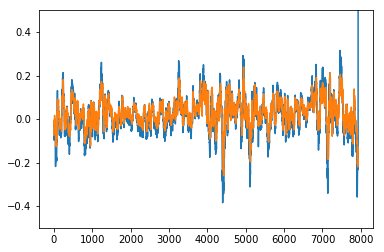

In [32]:
import matplotlib.pyplot as plt
plt.plot(trainY)
plt.plot(trainPredict)
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
plt.show()

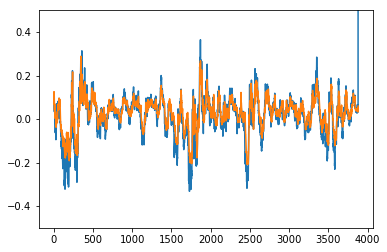

In [33]:
plt.plot(testY)
plt.plot(testPredict)
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
plt.show()

In [28]:
import matplotlib.pyplot as plt
import math

print testPredict
print trainY[0]

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataSet)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataSet)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataSet)-1, :] = testPredict

# plot baseline and predictions
print dataSet
plt.plot(dataSet[:,0],dataSet[:,2])
plt.plot(dataSet[0:len(trainPredict),0],trainPredict)
#plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()

[ 0.06852341  0.10196894  0.12787327 ...,  0.03644263  0.04753189
  0.05980539]
-0.0839679938301
Train Score: 54.04 RMSE
Test Score: 194.88 RMSE


IndexError: too many indices for array

In [46]:
print np.sqrt(40821616.0000)


6389.17960305
